## Importing Required Libraries and dataset

In [1]:
#importing necessary libraries
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
pd.set_option('display.max_rows', None) #pandas settings for showing complete output.

In [3]:
pd.set_option('display.max_columns', None)#pandas settings for showing complete output.

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/M.S. ML and AI/Machine Learning 2/Source files/train.csv')

## Glimpse and understanding of data

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.shape

(1460, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory data Analysis

### Null value Analysis

In [9]:
#dropping Unnecessary ID column
data = data.drop(['Id'],axis=1)

<AxesSubplot:>

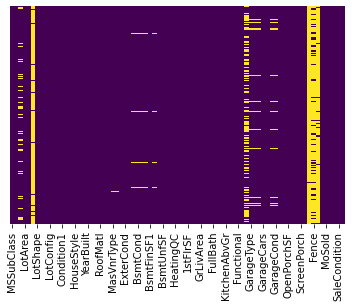

In [10]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [11]:
data = data.dropna(axis=1,how='all')

<AxesSubplot:>

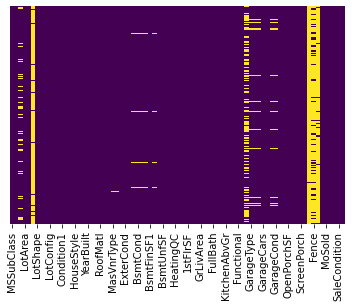

In [12]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
(data.isnull().sum()/data.shape[0])*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [14]:
#dropping columns with more than 30% missing values
data = data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

<AxesSubplot:>

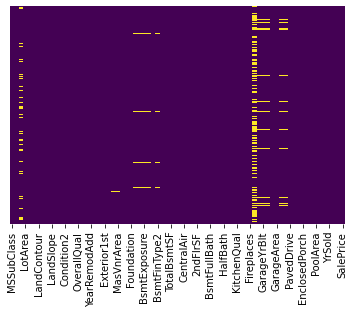

In [15]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [16]:
(data.isnull().sum()/data.shape[0])*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

### Imputing null values
 Imputing null values as we done have a large amount of data. 
 
 Imputing with 0 as it seems to be the most suitable option.

Looking at the type of values present in columns with null values.

In [17]:
data.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [18]:
data.LotFrontage.dtype

dtype('float64')

In [19]:
data.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [20]:
data.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [21]:
data.BsmtCond.unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [22]:
data.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [23]:
data.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [24]:
data.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [25]:
data.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [26]:
data.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [27]:
data.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [28]:
data.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [29]:
data.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [30]:
data.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [31]:
data.FireplaceQu.unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [32]:

flt_type=['LotFrontage','MasVnrArea','GarageYrBlt']
obj_to_NA = ['BsmtQual','FireplaceQu','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond','Electrical','MasVnrType']
#fill electrical to mixed


In [33]:
for i in flt_type:
  data[i] = data[i].fillna(np.median(data[-data[i].isnull()][i],axis=0))

In [34]:
for i in obj_to_NA:
  data[i] = data[i].fillna('Unknown Category')

<AxesSubplot:>

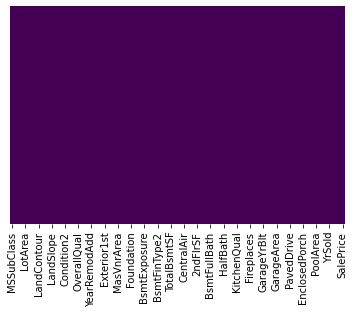

In [35]:
sns.heatmap(data.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [36]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown Category,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Univariate Analysis

In [38]:
#sepertating continuous and categorical variables based of data type of the particular variable.
continuous = []
category = []
for i in data.columns:
  if data[i].dtype != 'object':
    continuous.append(i)
  else:
    category.append(i)

print(continuous,end='')
print()
print(category,end='')

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'Garag

In [39]:
no_of_continuous = len(continuous)
no_of_category = len(category)

In [40]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown Category,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [41]:
#data driven metric
# Calculate age of property at time of sale
data['Age'] = data['YrSold'] - data['YearRemodAdd']

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130', '130-140', '140-150', '150-160', '160-170']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)

In [42]:
#dropping the date columns as we have extracted the data we need from them.
data=data.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1)

In [43]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,Age_Group
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown Category,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,5,0-10
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,31,30-40
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,6,0-10
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,36,30-40
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,8,0-10


In [44]:
data.shape

(1460, 74)

In [45]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

In [46]:
data = data.drop('MoSold',axis=1)#dropping unwanted variable.

In [47]:
newcat = ['MSSubClass', 'OverallQual', 'OverallCond','Age_Group'] #collection of numerical categorical variables.

In [48]:
#creating collection of all categorical variables and continuous variables seperately.
categorical_variables=category+newcat 

continuous_variables = ['Age','LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [49]:
len(categorical_variables)

43

In [50]:
len(continuous_variables)

30

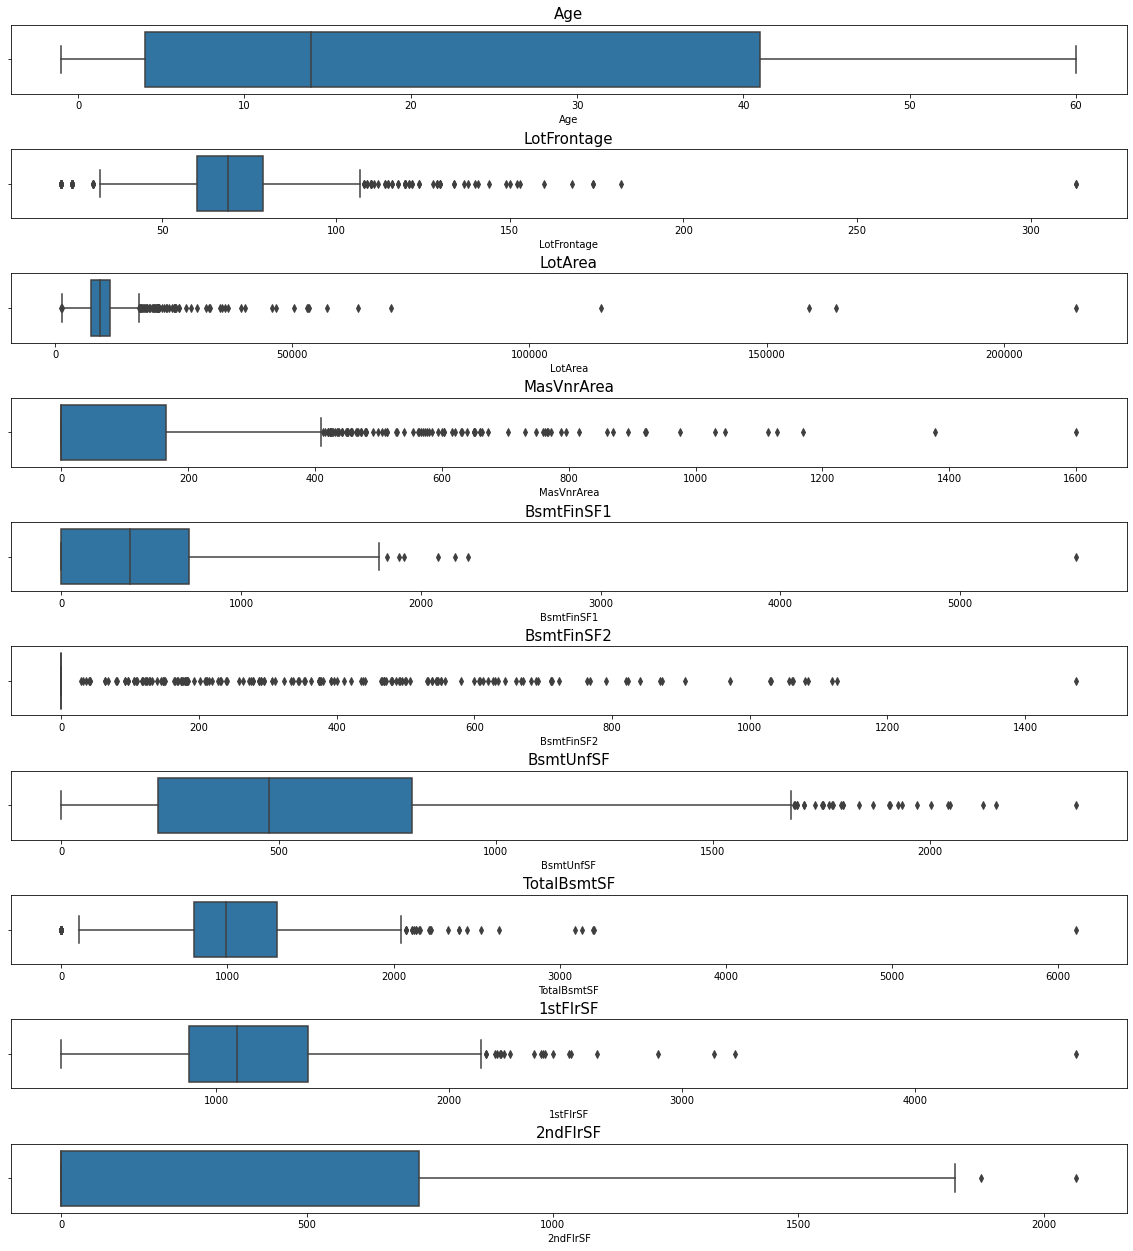

In [51]:
fig,ax = plt.subplots(nrows=10,figsize=(20,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[0]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[0]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[1]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[1]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[2]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[2]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[3]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[3]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[4]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[4]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[5]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[5]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[6]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[6]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[7]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[7]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[8]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[8]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[9]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[9]), fontsize=15)
plt.show()

#observation
#Many variables have outliers.

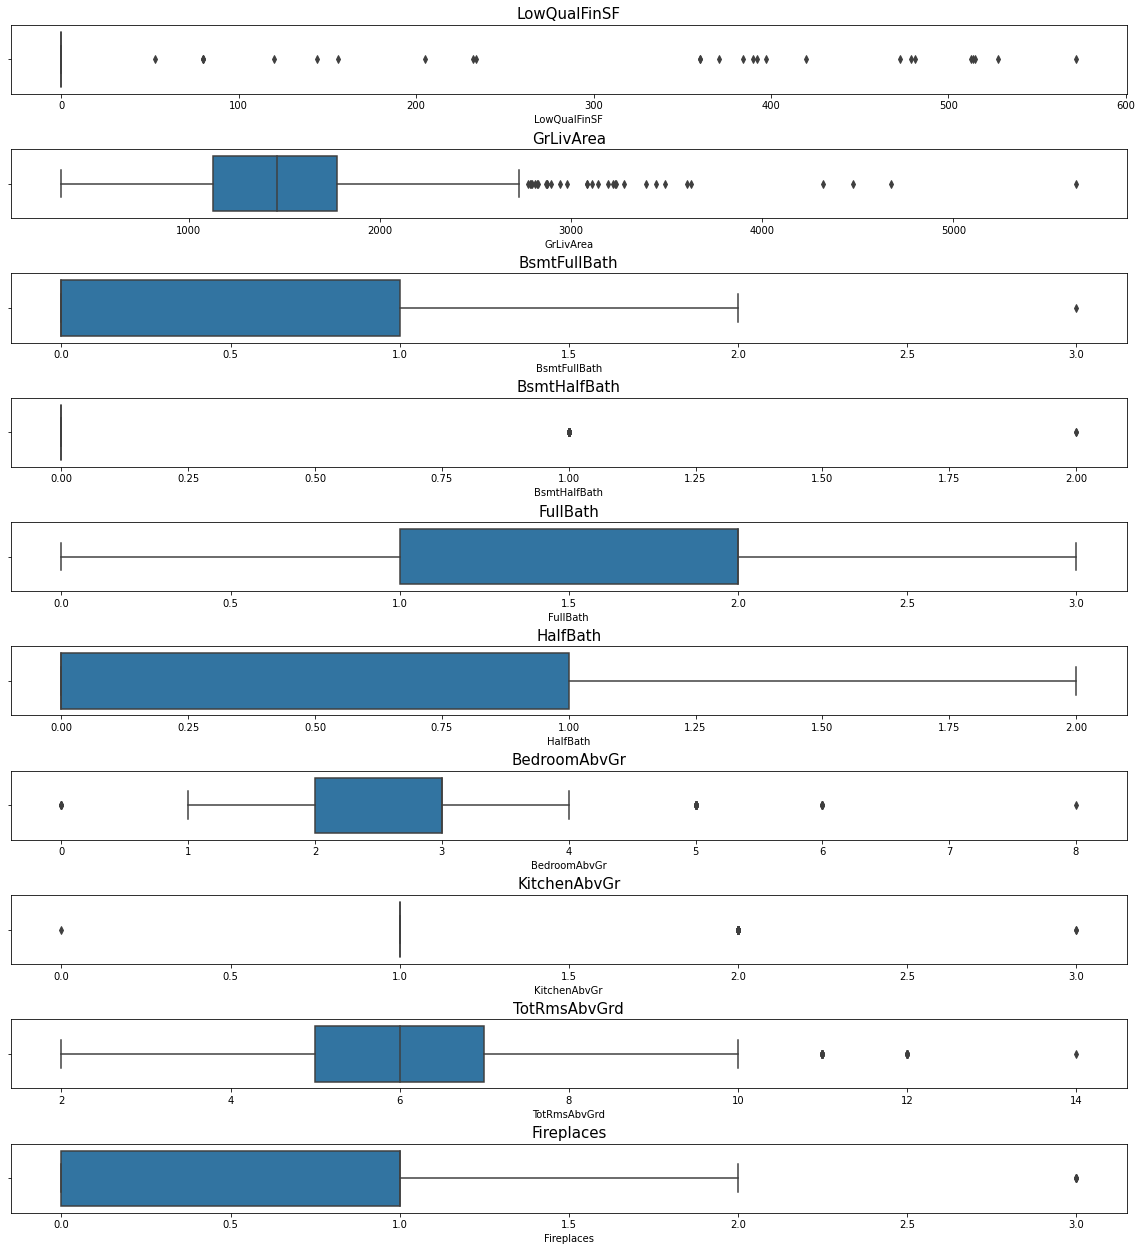

In [52]:
fig,ax = plt.subplots(nrows=10,figsize=(20,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[10]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[10]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[11]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[11]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[12]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[12]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[13]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[13]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[14]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[14]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[15]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[15]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[16]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[16]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[17]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[17]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[18]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[18]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[19]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[19]), fontsize=15)
plt.show()
#Obsevation
#Many variables has outliers

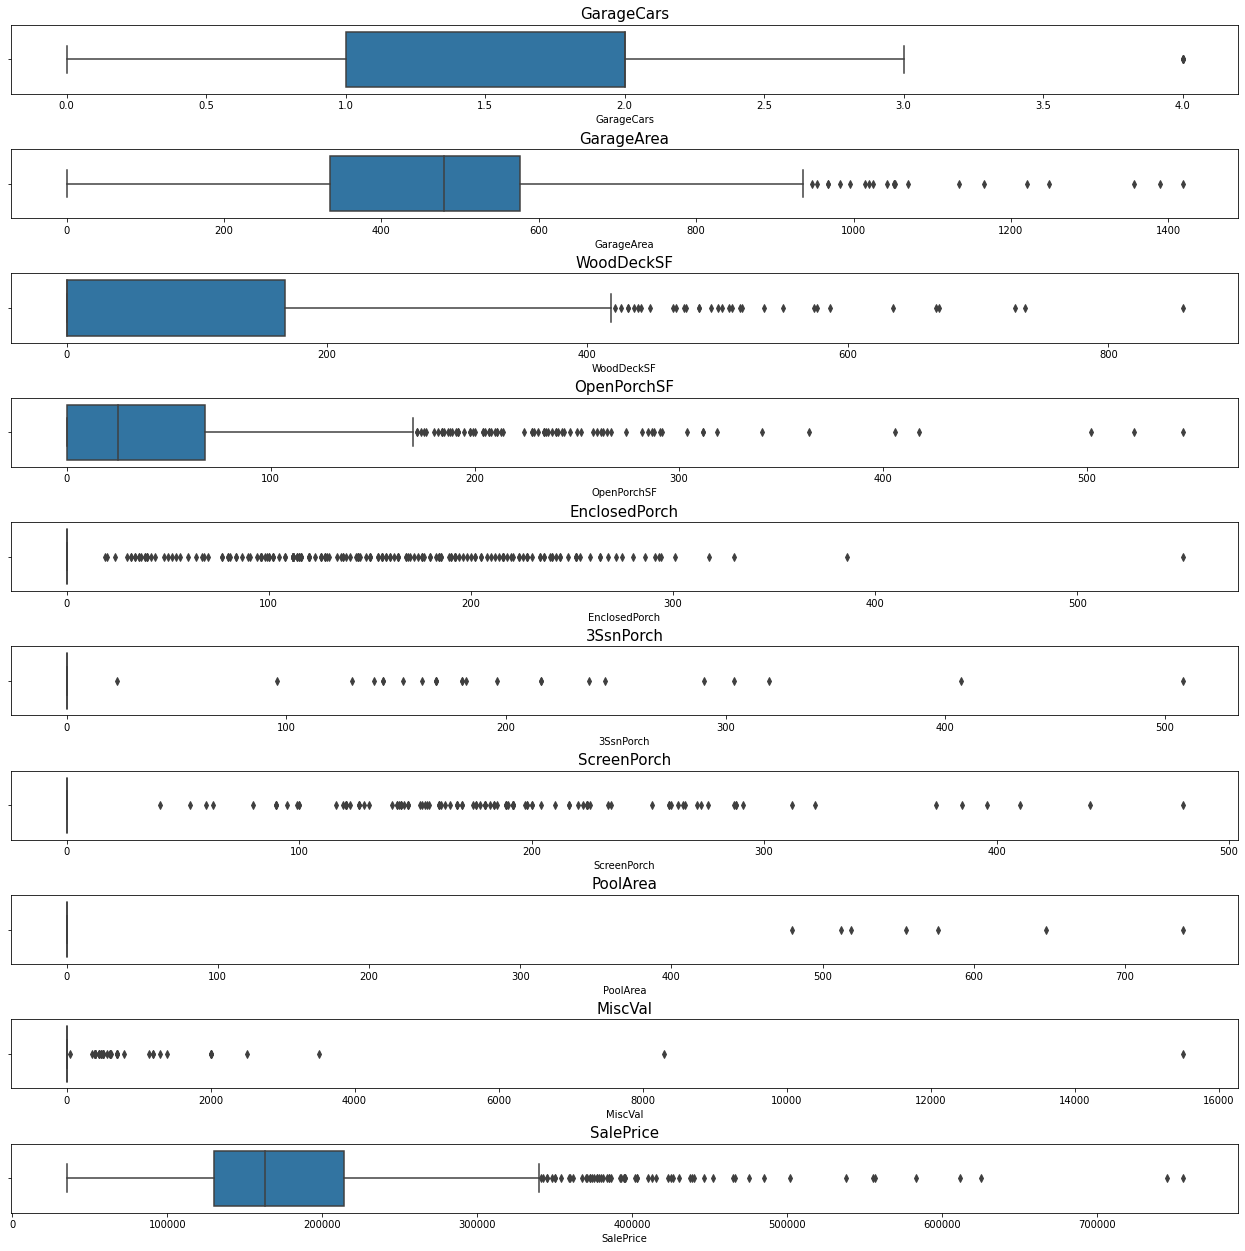

In [53]:
fig,ax = plt.subplots(nrows=10,figsize=(22,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[20]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[20]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[21]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[21]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[22]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[22]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[23]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[23]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[24]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[24]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[25]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[25]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[26]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[26]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[27]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[27]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[28]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[28]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[29]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[29]), fontsize=15)
plt.show()
#Observation
#Many variables has outliers. 

Since we have a lot of outliers and very low amount of data. We will compensate with removing the extreme outliers and then proceed with the modeling.

In [54]:
data = data[data['LotFrontage']<200] #dropping the records.

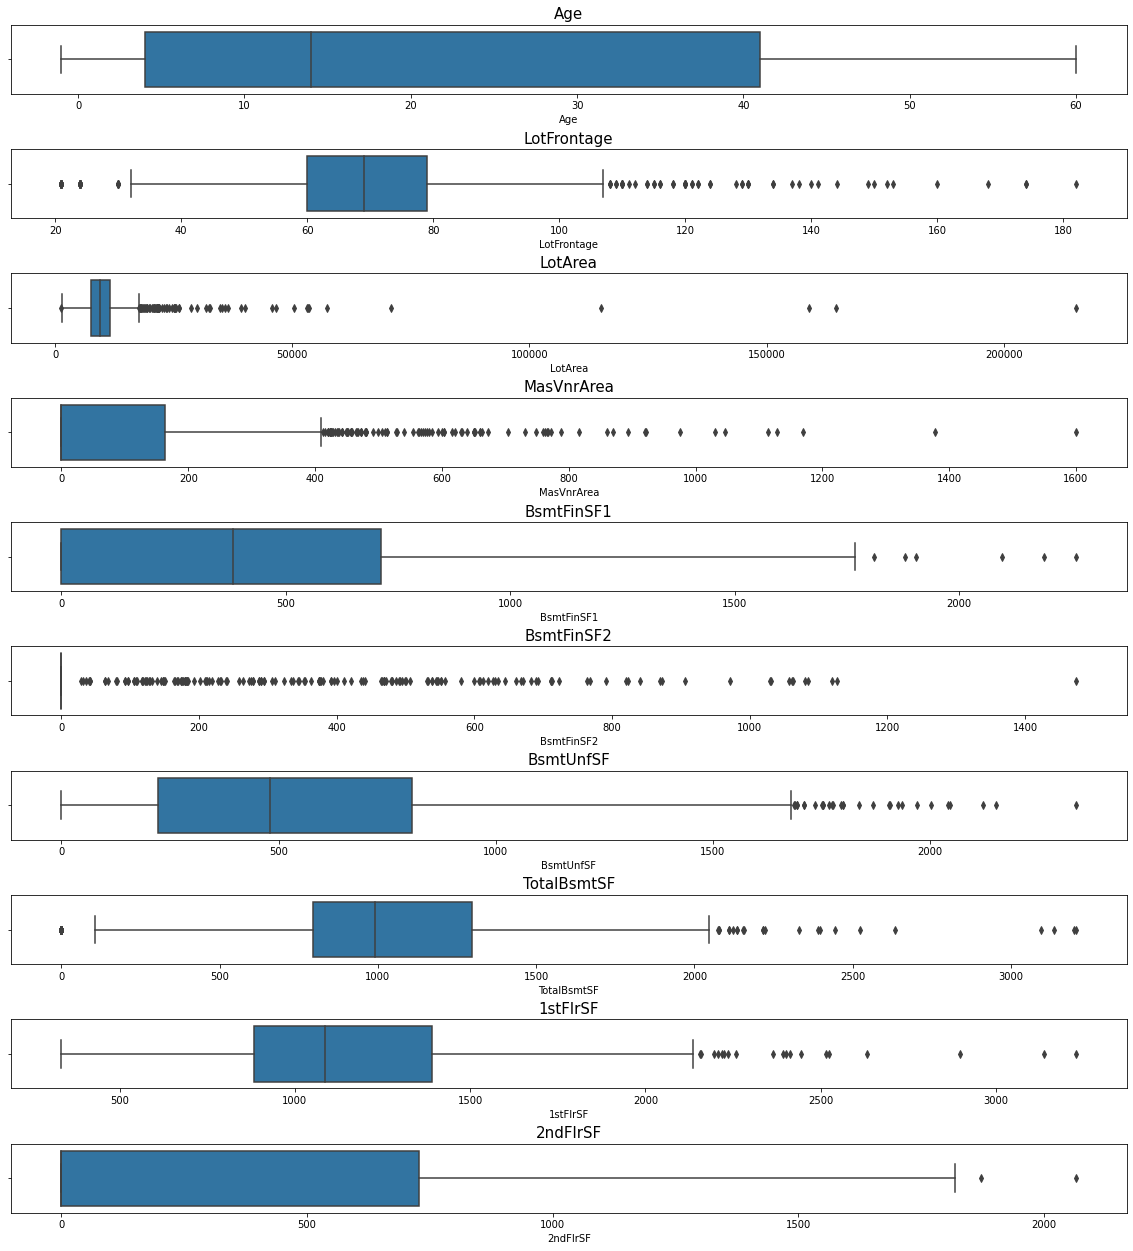

In [55]:
#Plotting the variables again to see the distribution.
fig,ax = plt.subplots(nrows=10,figsize=(20,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[0]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[0]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[1]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[1]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[2]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[2]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[3]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[3]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[4]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[4]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[5]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[5]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[6]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[6]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[7]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[7]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[8]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[8]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[9]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[9]), fontsize=15)
plt.show()

In [56]:
data[data['LotArea']>100000] #checking for the records to be dropped.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age,Age_Group
249,50,RL,69.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,WD,Normal,277000,1,0-10
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,WD,Normal,375000,44,40-50
335,190,RL,69.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,WD,Normal,228950,43,40-50
706,20,RL,69.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,WD,Normal,302000,5,0-10


In [57]:
data = data[data['LotArea']<100000] #dropping records.

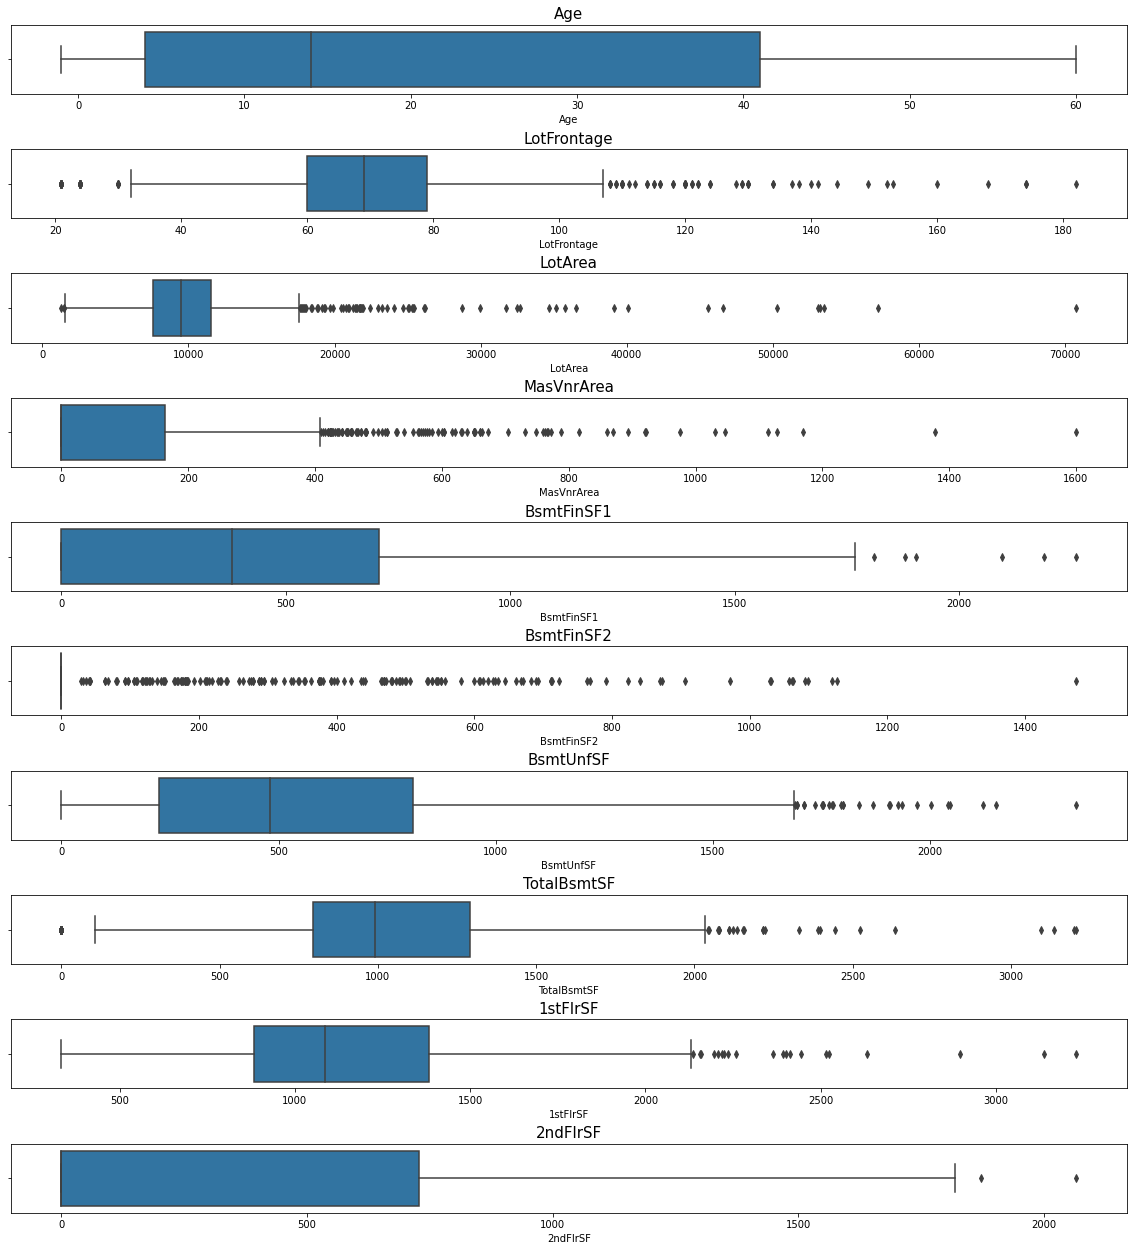

In [58]:
#Plotting all variables again to see the distribution.
fig,ax = plt.subplots(nrows=10,figsize=(20,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[0]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[0]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[1]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[1]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[2]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[2]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[3]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[3]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[4]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[4]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[5]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[5]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[6]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[6]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[7]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[7]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[8]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[8]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[9]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[9]), fontsize=15)
plt.show()

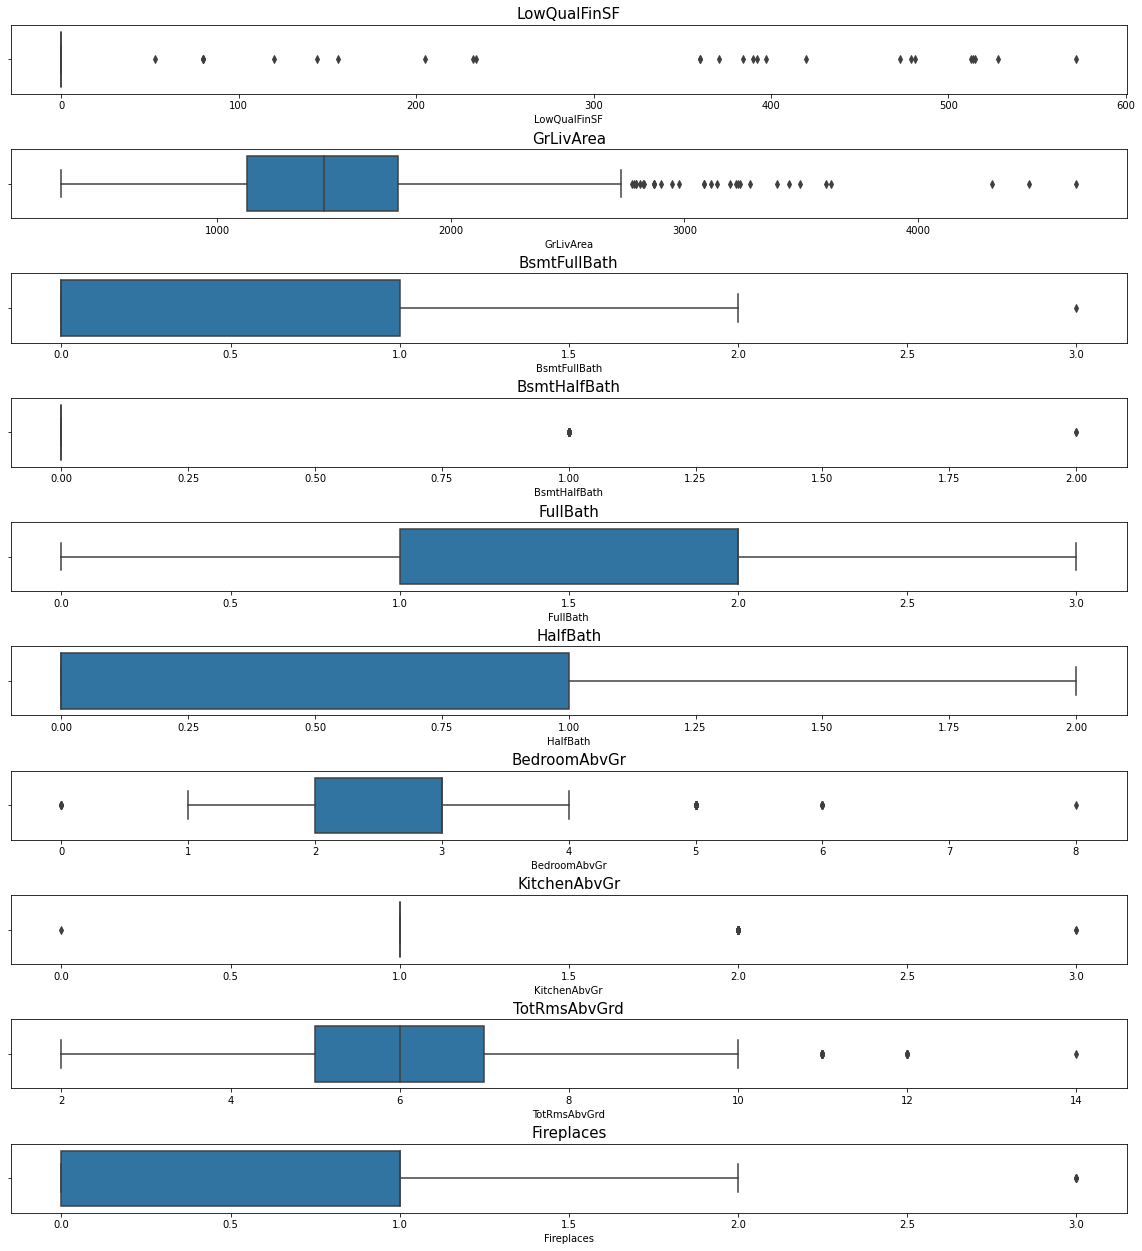

In [59]:
#Plotting all variables again to see the distribution.
fig,ax = plt.subplots(nrows=10,figsize=(20,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[10]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[10]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[11]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[11]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[12]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[12]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[13]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[13]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[14]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[14]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[15]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[15]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[16]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[16]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[17]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[17]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[18]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[18]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[19]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[19]), fontsize=15)
plt.show()

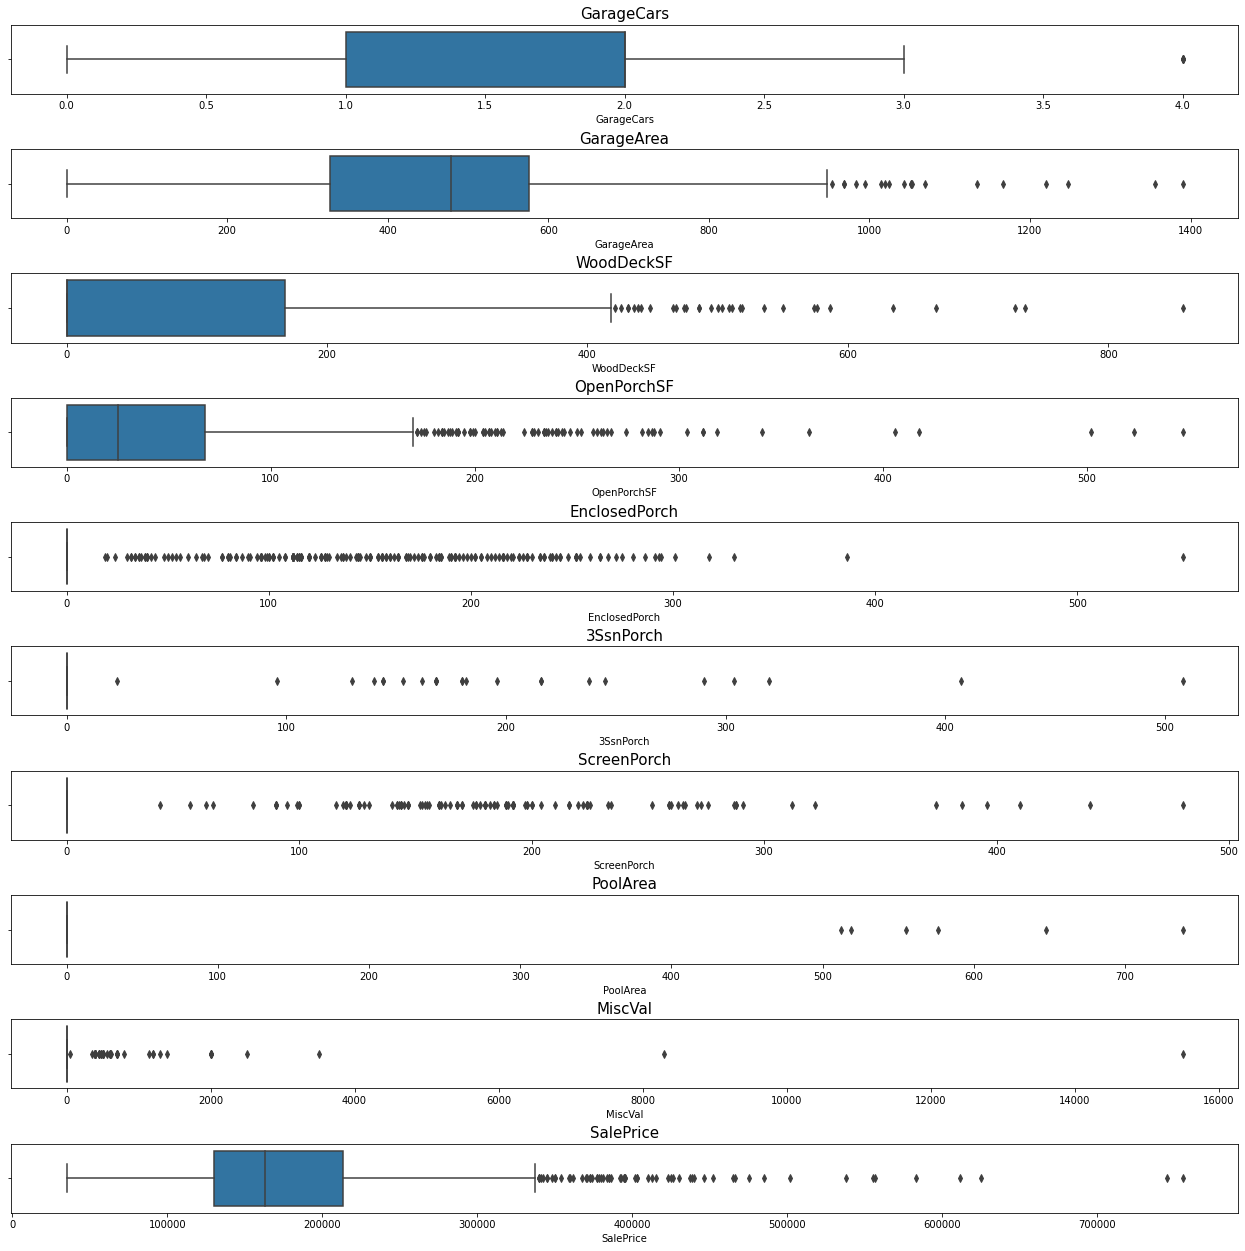

In [60]:
#plotting all variables again to see the distribution.
fig,ax = plt.subplots(nrows=10,figsize=(22,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[20]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[20]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[21]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[21]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[22]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[22]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[23]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[23]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[24]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[24]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[25]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[25]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[26]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[26]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[27]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[27]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[28]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[28]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[29]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[29]), fontsize=15)
plt.show()

In [61]:
data[data['MiscVal']>8000] #checking for the records to drop.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age,Age_Group
346,20,RL,69.0,12772,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,498,Unf,0,460,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,1,0,2,1,TA,5,Typ,0,Unknown Category,Attchd,RFn,1,301,TA,TA,Y,0,0,0,0,0,0,15500,WD,Normal,151500,9,0-10
1230,90,RL,69.0,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,WD,Normal,190000,30,20-30


In [62]:
data = data[data['MiscVal']<8000] #dropping the records.

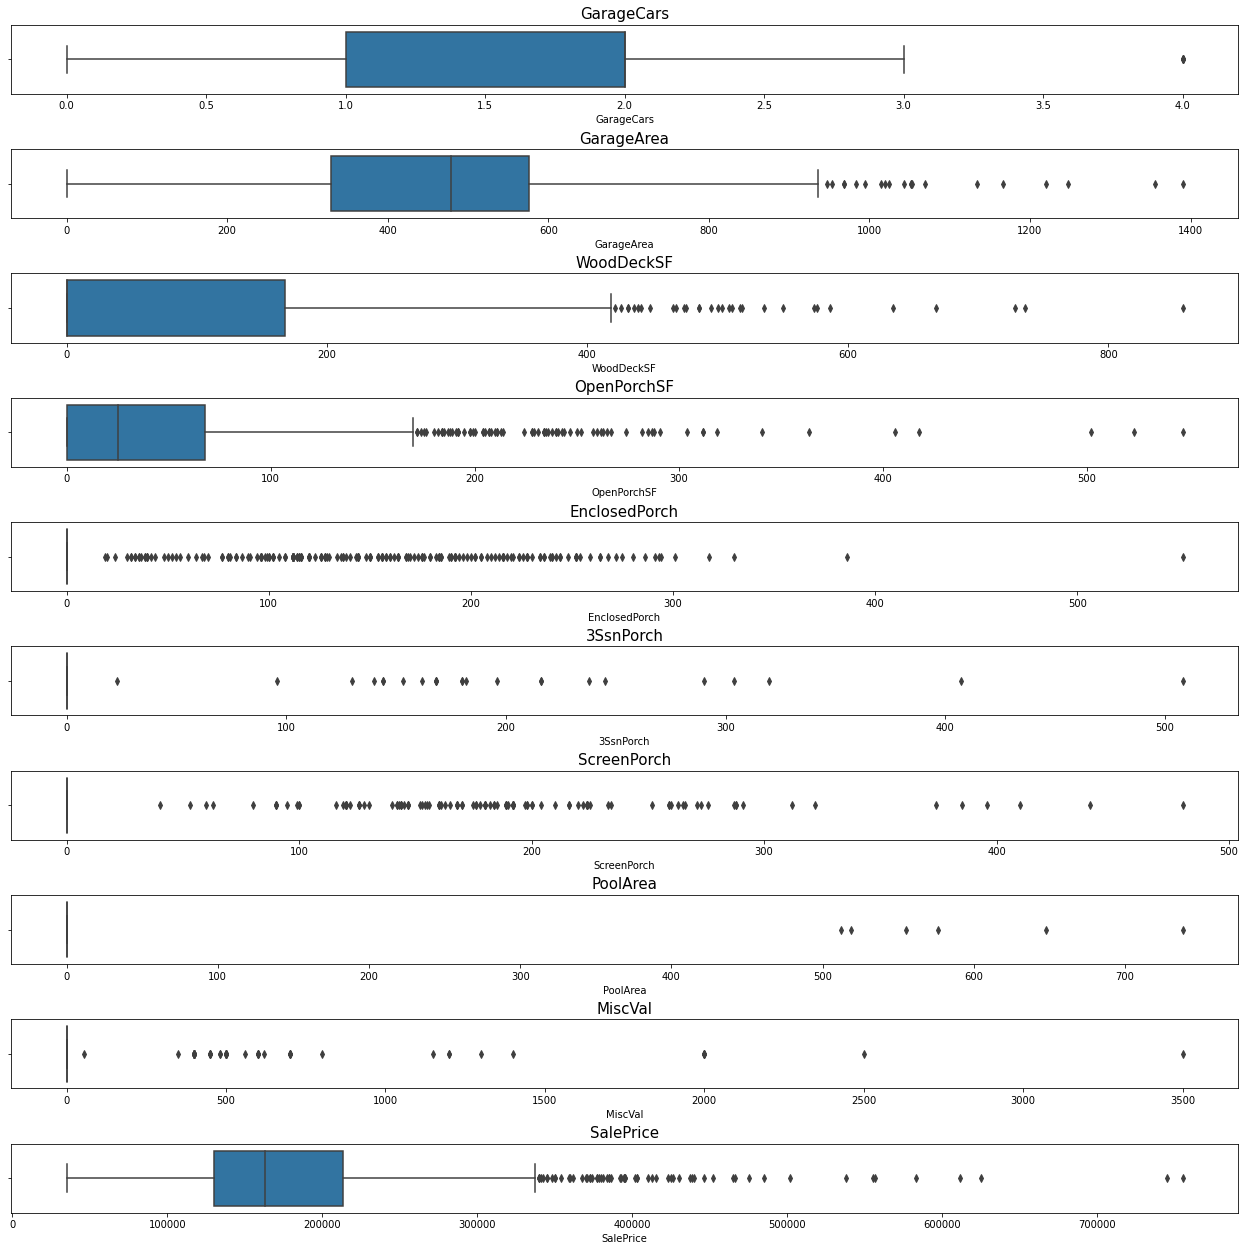

In [63]:
#plotting all variables again to see the distribution.
fig,ax = plt.subplots(nrows=10,figsize=(22,12))
plt.subplots_adjust(hspace = 0.8, top = 1.5)
g1 = sns.boxplot(data[continuous_variables[20]],ax=ax[0])
g1.set_title("{}".format(continuous_variables[20]), fontsize=15)
g2 = sns.boxplot(data[continuous_variables[21]],ax=ax[1])
g2.set_title("{}".format(continuous_variables[21]), fontsize=15)
g3 = sns.boxplot(data[continuous_variables[22]],ax=ax[2])
g3.set_title("{}".format(continuous_variables[22]), fontsize=15)
g4 = sns.boxplot(data[continuous_variables[23]],ax=ax[3])
g4.set_title("{}".format(continuous_variables[23]), fontsize=15)
g5 = sns.boxplot(data[continuous_variables[24]],ax=ax[4])
g5.set_title("{}".format(continuous_variables[24]), fontsize=15)
g6 = sns.boxplot(data[continuous_variables[25]],ax=ax[5])
g6.set_title("{}".format(continuous_variables[25]), fontsize=15)
g7 = sns.boxplot(data[continuous_variables[26]],ax=ax[6])
g7.set_title("{}".format(continuous_variables[26]), fontsize=15)
g8 = sns.boxplot(data[continuous_variables[27]],ax=ax[7])
g8.set_title("{}".format(continuous_variables[27]), fontsize=15)
g9 = sns.boxplot(data[continuous_variables[28]],ax=ax[8])
g9.set_title("{}".format(continuous_variables[28]), fontsize=15)
g10 = sns.boxplot(data[continuous_variables[29]],ax=ax[9])
g10.set_title("{}".format(continuous_variables[29]), fontsize=15)
plt.show()

Now we can proceed with the fellow outliers as they will not creating much impact on the model.

### Univariate Analysis on categorical Variables.

In [64]:
len(categorical_variables)

43

Text(0.5, 1.0, 'MSZoning')

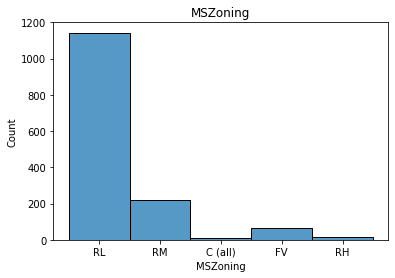

In [65]:
g=sns.histplot(data[categorical_variables[0]])
g.set_title(categorical_variables[0])
#Observation
#Most of the properties are from Residential low density zone
#There are no properties from Residential  low density park zone
#Very few properties from commercial zone. 

Text(0.5, 1.0, 'Street')

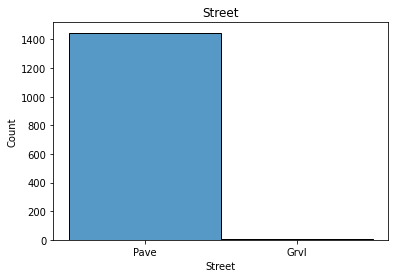

In [66]:
g=sns.histplot(data[categorical_variables[1]])
g.set_title(categorical_variables[1])
#Observation
#Most of the properties have paved road access. Gravel road access are almost negligible

Text(0.5, 1.0, 'LotShape')

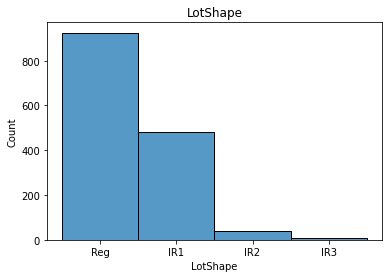

In [67]:
g=sns.histplot(data[categorical_variables[2]])
g.set_title(categorical_variables[2])
#Observation
#Most of the properties are of regular shape.
#Very few have irregular shape.

Text(0.5, 1.0, 'LandContour')

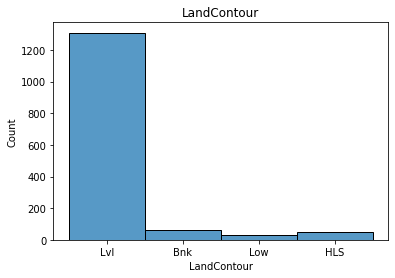

In [68]:
g=sns.histplot(data[categorical_variables[3]])
g.set_title(categorical_variables[3])
#Observation
#Most of the properties have flat or near flat contour.

Text(0.5, 1.0, 'Utilities')

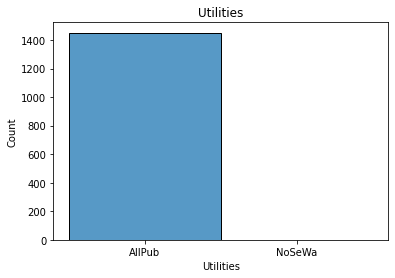

In [69]:
g=sns.histplot(data[categorical_variables[4]])
g.set_title(categorical_variables[4])
#Observation
#Most of the properties have all public utilities.
#Very few have Electricity and Gas only.
#No properties falls under Electricity,Gas and Water or Electricity only category.

Text(0.5, 1.0, 'LotConfig')

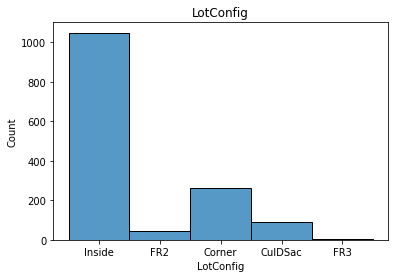

In [70]:
g=sns.histplot(data[categorical_variables[5]])
g.set_title(categorical_variables[5])
#Observation
#Most of the properties are inside plotted.
#Very few properties have 3 side front.

Text(0.5, 1.0, 'LandSlope')

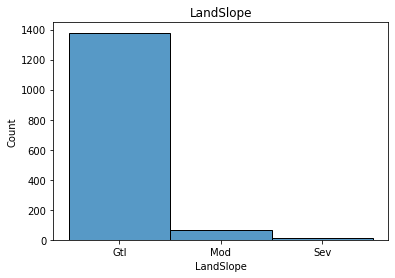

In [71]:
g=sns.histplot(data[categorical_variables[6]])
g.set_title(categorical_variables[6])
#Observation
#Most of the properties have gentle slope.
#Very few have severe slope.

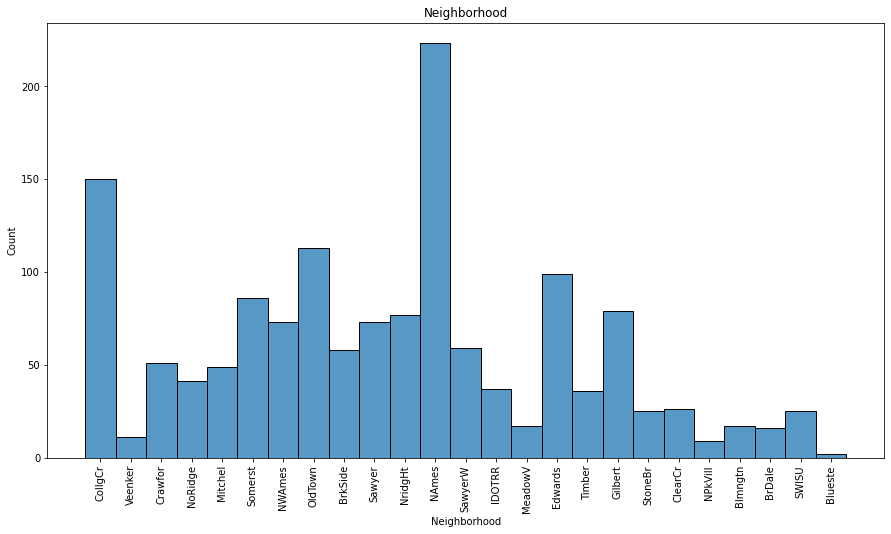

In [72]:
plt.figure(figsize=(15,8))
g=sns.histplot(data[categorical_variables[7]])
g.set_title(categorical_variables[7])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have neighbourhood of North Ames.
#Very few properties have the neighbourhood of Bluestems

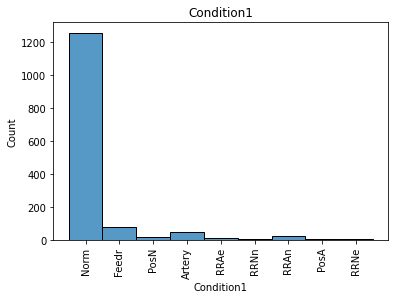

In [73]:
g=sns.histplot(data[categorical_variables[8]])
g.set_title(categorical_variables[8])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have Normal proximity.

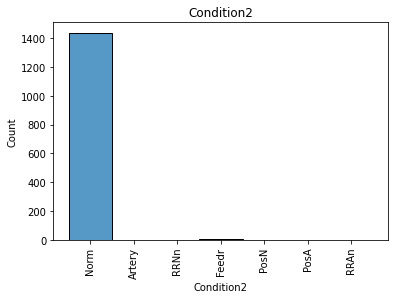

In [74]:
g=sns.histplot(data[categorical_variables[9]])
g.set_title(categorical_variables[9])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have normal proximity to other conditions.

Text(0.5, 1.0, 'BldgType')

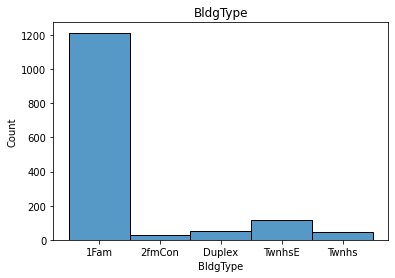

In [75]:
g=sns.histplot(data[categorical_variables[10]])
g.set_title(categorical_variables[10])
#Observation
#Most of the properties have single familty detached type of dwelling.
#Very few have 2 family conversion.

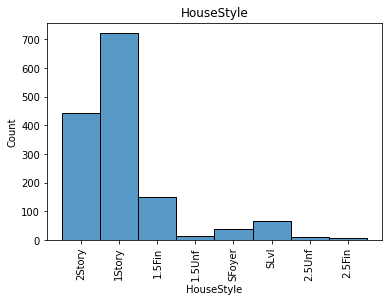

In [76]:
g=sns.histplot(data[categorical_variables[11]])
g.set_title(categorical_variables[11])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have One stoy style of dwelling.
#Very few properties have one and half story second level finished, two and half story 2nd level finished and unfinished style of dwelling.

Text(0.5, 1.0, 'RoofStyle')

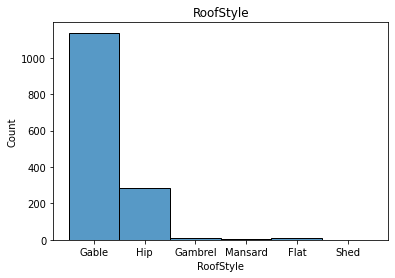

In [77]:
g=sns.histplot(data[categorical_variables[12]])
g.set_title(categorical_variables[12])
#Observation
#Most of the propertie have Gable rooftop.
#Few have Gable barn rooftop and flat rooftop.
#Very few properties have Mansard or shed rooftop.

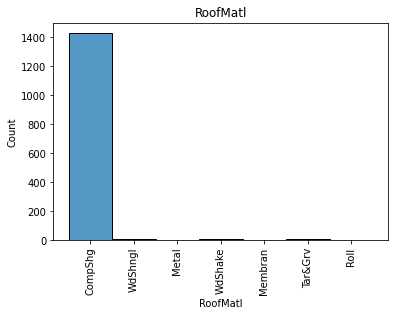

In [78]:
g=sns.histplot(data[categorical_variables[13]])
g.set_title(categorical_variables[13])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have roof of standard (Composite) Shingle Material.
#Very few properties have roof of Metal or Membrane or Roll material.

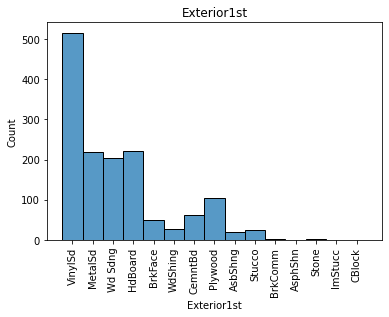

In [79]:
g=sns.histplot(data[categorical_variables[14]])
g.set_title(categorical_variables[14])
plt.xticks(rotation=90)
plt.show()
#Observation
#Most of the properties have VinylSiding exterior.
#Very few properties have Brick common or Stone or Asphalt Shingles or Imitation Stucco or Cinder Block exterior.

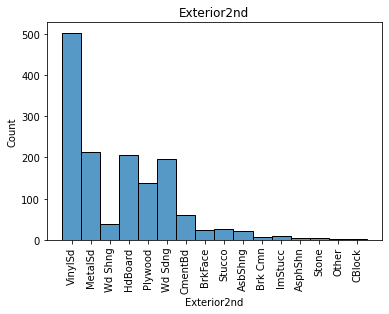

In [80]:
g=sns.histplot(data[categorical_variables[15]])
g.set_title(categorical_variables[15])
plt.xticks(rotation=90)
plt.show()
#Observation
#Second exterior follows similar pattern as First Exterior.
#More properties have Plywood as second exterior.

Text(0.5, 1.0, 'MasVnrType')

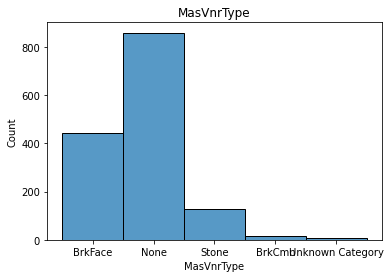

In [81]:
g=sns.histplot(data[categorical_variables[16]])
g.set_title(categorical_variables[16])
#Observation
#Most properties dont have Masonry veener type.
#Few properties have Brick common masonry veener type.

Text(0.5, 1.0, 'ExterQual')

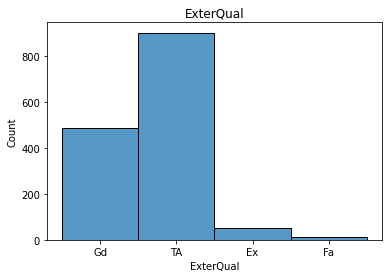

In [82]:
g=sns.histplot(data[categorical_variables[17]])
g.set_title(categorical_variables[17])
#Observation
#Most of the properties have average or typical exterior material quality.
#Few properties have fair exterior material quality.

Text(0.5, 1.0, 'ExterCond')

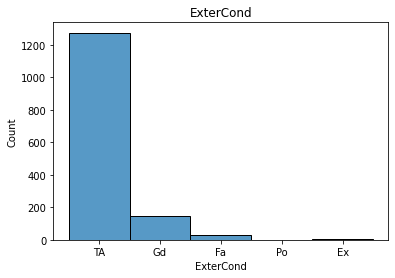

In [83]:
g=sns.histplot(data[categorical_variables[18]])
g.set_title(categorical_variables[18])
#Observation
#Most of the properties have average or typical present exterior material quality condition.
#Few properties have Excellent present exterior material quality condition.
#Some properties have poor present exterior material quality condition.

Text(0.5, 1.0, 'Foundation')

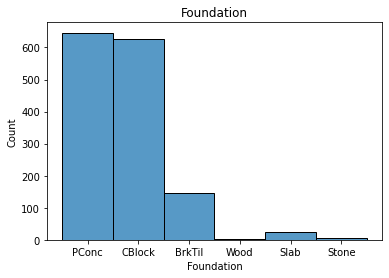

In [84]:
g=sns.histplot(data[categorical_variables[19]])
g.set_title(categorical_variables[19])
#Observation
#Most of the properties have foundation of poured concrete or cinder block.
#Very few properties have foundation of wood or stone.

Text(0.5, 1.0, 'BsmtQual')

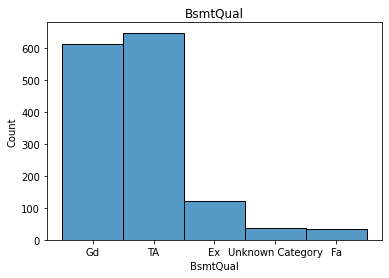

In [85]:
g=sns.histplot(data[categorical_variables[20]])
g.set_title(categorical_variables[20])
#Observation
#Most of the properties have good or Typical basement heights.

Text(0.5, 1.0, 'BsmtCond')

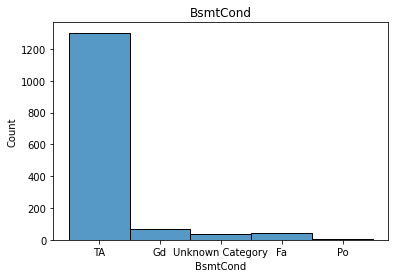

In [86]:
g=sns.histplot(data[categorical_variables[21]])
g.set_title(categorical_variables[21])
#Observation
#Most of the properties have typical condition of the basement.
#Very few have poor basement condition.

Text(0.5, 1.0, 'BsmtExposure')

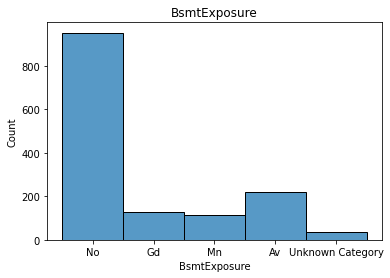

In [87]:
g=sns.histplot(data[categorical_variables[22]])
g.set_title(categorical_variables[22])
#Observation
#Most of the properties have no exposure basement.

Text(0.5, 1.0, 'BsmtFinType1')

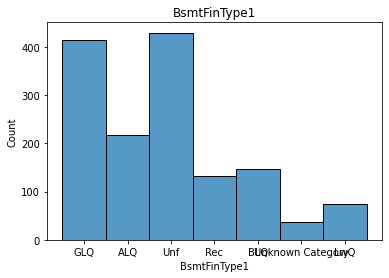

In [88]:
g=sns.histplot(data[categorical_variables[23]])
g.set_title(categorical_variables[23])
#Observation
#Most of the properties are unfinished or good living quarters basement.

Text(0.5, 1.0, 'BsmtFinType2')

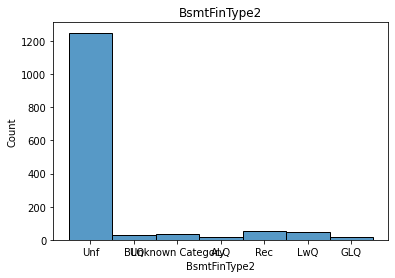

In [89]:
g=sns.histplot(data[categorical_variables[24]])
g.set_title(categorical_variables[24])
#Observation
#Most of the properties have unfinished basement area with multiple basement type.

Text(0.5, 1.0, 'Heating')

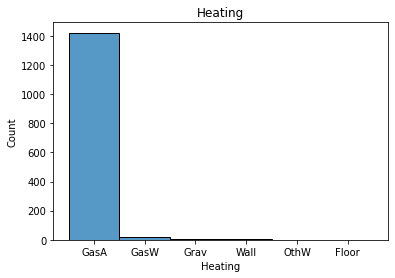

In [90]:
g=sns.histplot(data[categorical_variables[25]])
g.set_title(categorical_variables[25])
#Observation
#Most of the properties have Gas forced warm air furnace type heating.

Text(0.5, 1.0, 'HeatingQC')

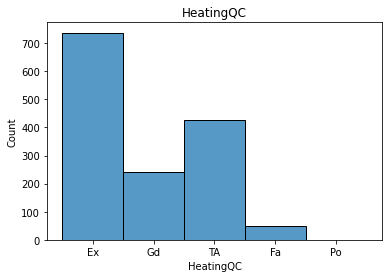

In [91]:
g=sns.histplot(data[categorical_variables[26]])
g.set_title(categorical_variables[26])
#Observation
#Most of the properties have excellet heating quality.

Text(0.5, 1.0, 'CentralAir')

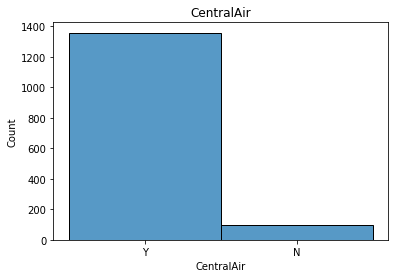

In [92]:
g=sns.histplot(data[categorical_variables[27]])
g.set_title(categorical_variables[27])
#Observation
#Most of the properties have central air conditioning.

Text(0.5, 1.0, 'Electrical')

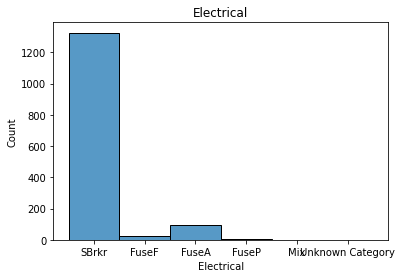

In [93]:
g=sns.histplot(data[categorical_variables[28]])
g.set_title(categorical_variables[28])
#Observation
#Most of the properties have Standard Circuit Breakers & Romex type of electrical system.

Text(0.5, 1.0, 'KitchenQual')

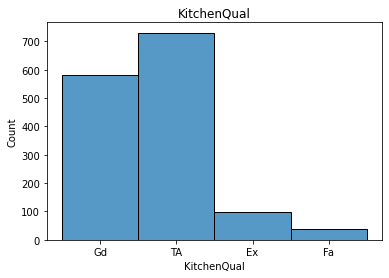

In [94]:
g=sns.histplot(data[categorical_variables[29]])
g.set_title(categorical_variables[29])
#Observation
#MOst of the properties have Average/Typical Kitchen Quality.

Text(0.5, 1.0, 'Functional')

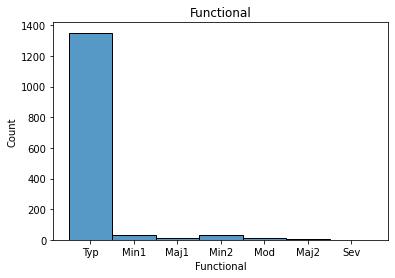

In [95]:
g=sns.histplot(data[categorical_variables[30]])
g.set_title(categorical_variables[30])
#Observation
#Most of the properties have typical home functionality.

Text(0.5, 1.0, 'FireplaceQu')

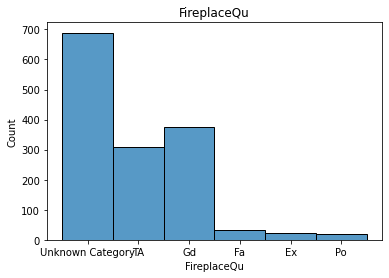

In [96]:
g=sns.histplot(data[categorical_variables[31]])
g.set_title(categorical_variables[31])
#Observation
#Most of the properties have garage attached to home.

Text(0.5, 1.0, 'GarageType')

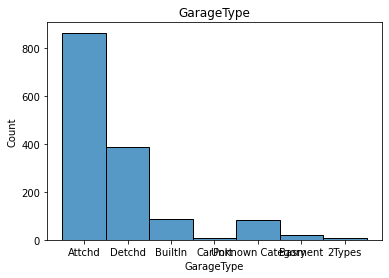

In [97]:
g=sns.histplot(data[categorical_variables[32]])
g.set_title(categorical_variables[32])
#Observation
#Most of the properties have garage with unfinished interior.

Text(0.5, 1.0, 'GarageFinish')

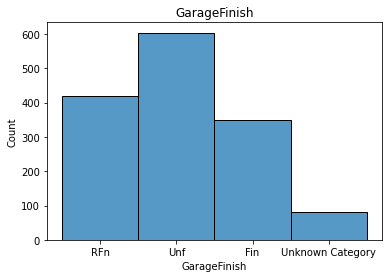

In [98]:
g=sns.histplot(data[categorical_variables[33]])
g.set_title(categorical_variables[33])
#Observation
#Most of the properties have typical/Average garage quality.

Text(0.5, 1.0, 'GarageQual')

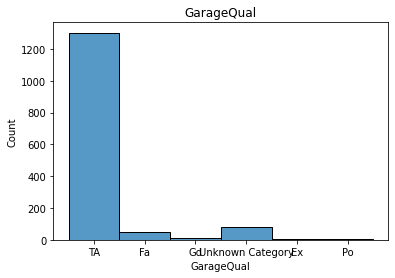

In [99]:
g=sns.histplot(data[categorical_variables[34]])
g.set_title(categorical_variables[34])
#Observation
#Most of the properties have Typical/Average garage condition.

Text(0.5, 1.0, 'GarageCond')

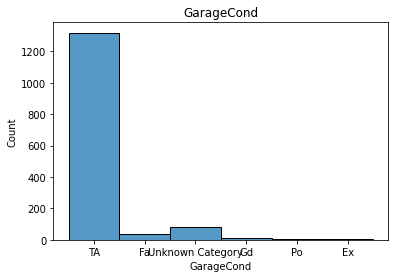

In [100]:
g=sns.histplot(data[categorical_variables[35]])
g.set_title(categorical_variables[35])
#Observation
#Most of the properties have paved driveway.

Text(0.5, 1.0, 'PavedDrive')

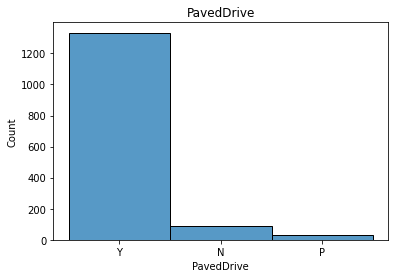

In [101]:
g=sns.histplot(data[categorical_variables[36]])
g.set_title(categorical_variables[36])
#Observation
#Most of the properties are Warranty Deed-Conventional type of sale.

Text(0.5, 1.0, 'SaleType')

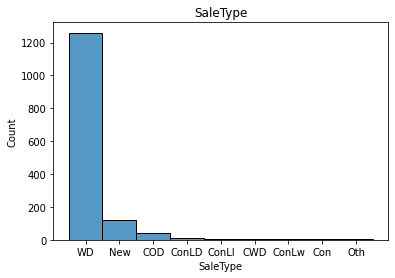

In [102]:
g=sns.histplot(data[categorical_variables[37]])
g.set_title(categorical_variables[37])
#Observation
#Most of the properties have normal sale condition.

Text(0.5, 1.0, 'SaleCondition')

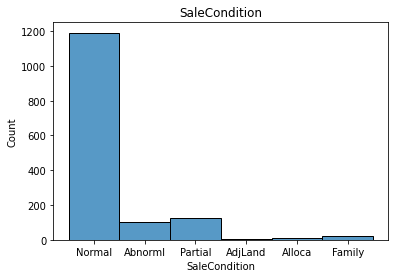

In [103]:
g=sns.histplot(data[categorical_variables[38]])
g.set_title(categorical_variables[38])
#Observation
#Most of the properties are normally sold.

Text(0.5, 1.0, 'MSSubClass')

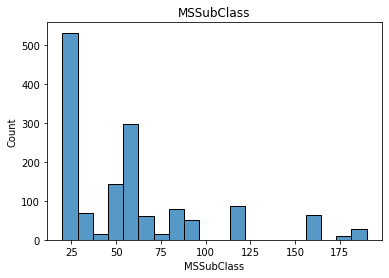

In [104]:
g=sns.histplot(data[categorical_variables[39]])
g.set_title(categorical_variables[39])
#Observation
#Most of the properties are average rated on quality.

Text(0.5, 1.0, 'OverallQual')

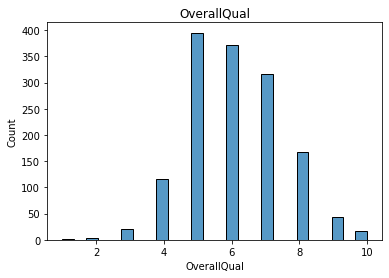

In [105]:
g=sns.histplot(data[categorical_variables[40]])
g.set_title(categorical_variables[40])
#Observation
#Most of the properties are rated average on the overall conditions..

Text(0.5, 1.0, 'OverallCond')

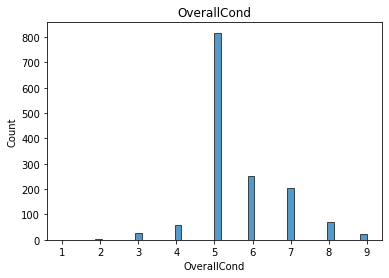

In [106]:
g=sns.histplot(data[categorical_variables[41]])
g.set_title(categorical_variables[41])
#Observation
#Most of the properties are newly built or are built in the span of 10 years.

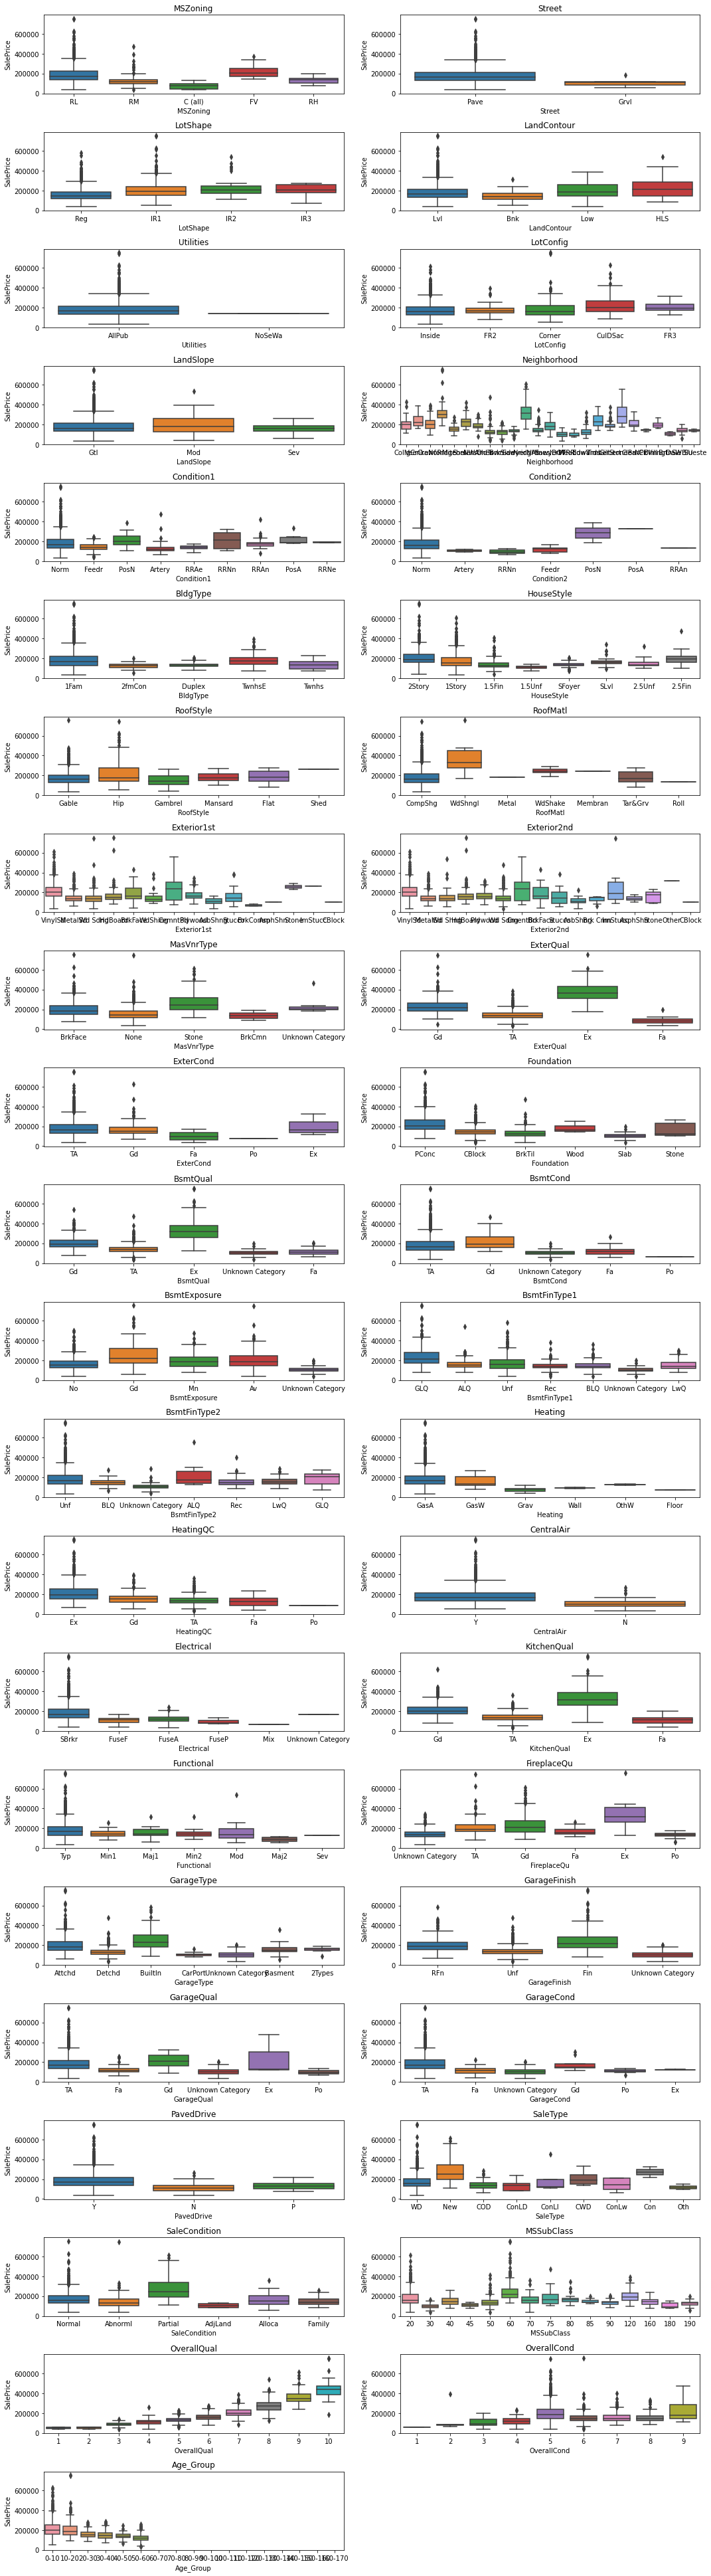

In [107]:
a = 41
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in categorical_variables:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.boxplot(data[i], data['SalePrice'])
    c = c + 1

plt.tight_layout()
plt.show();
#Observation
#Mean and distribution of the variables are varying for each feature.

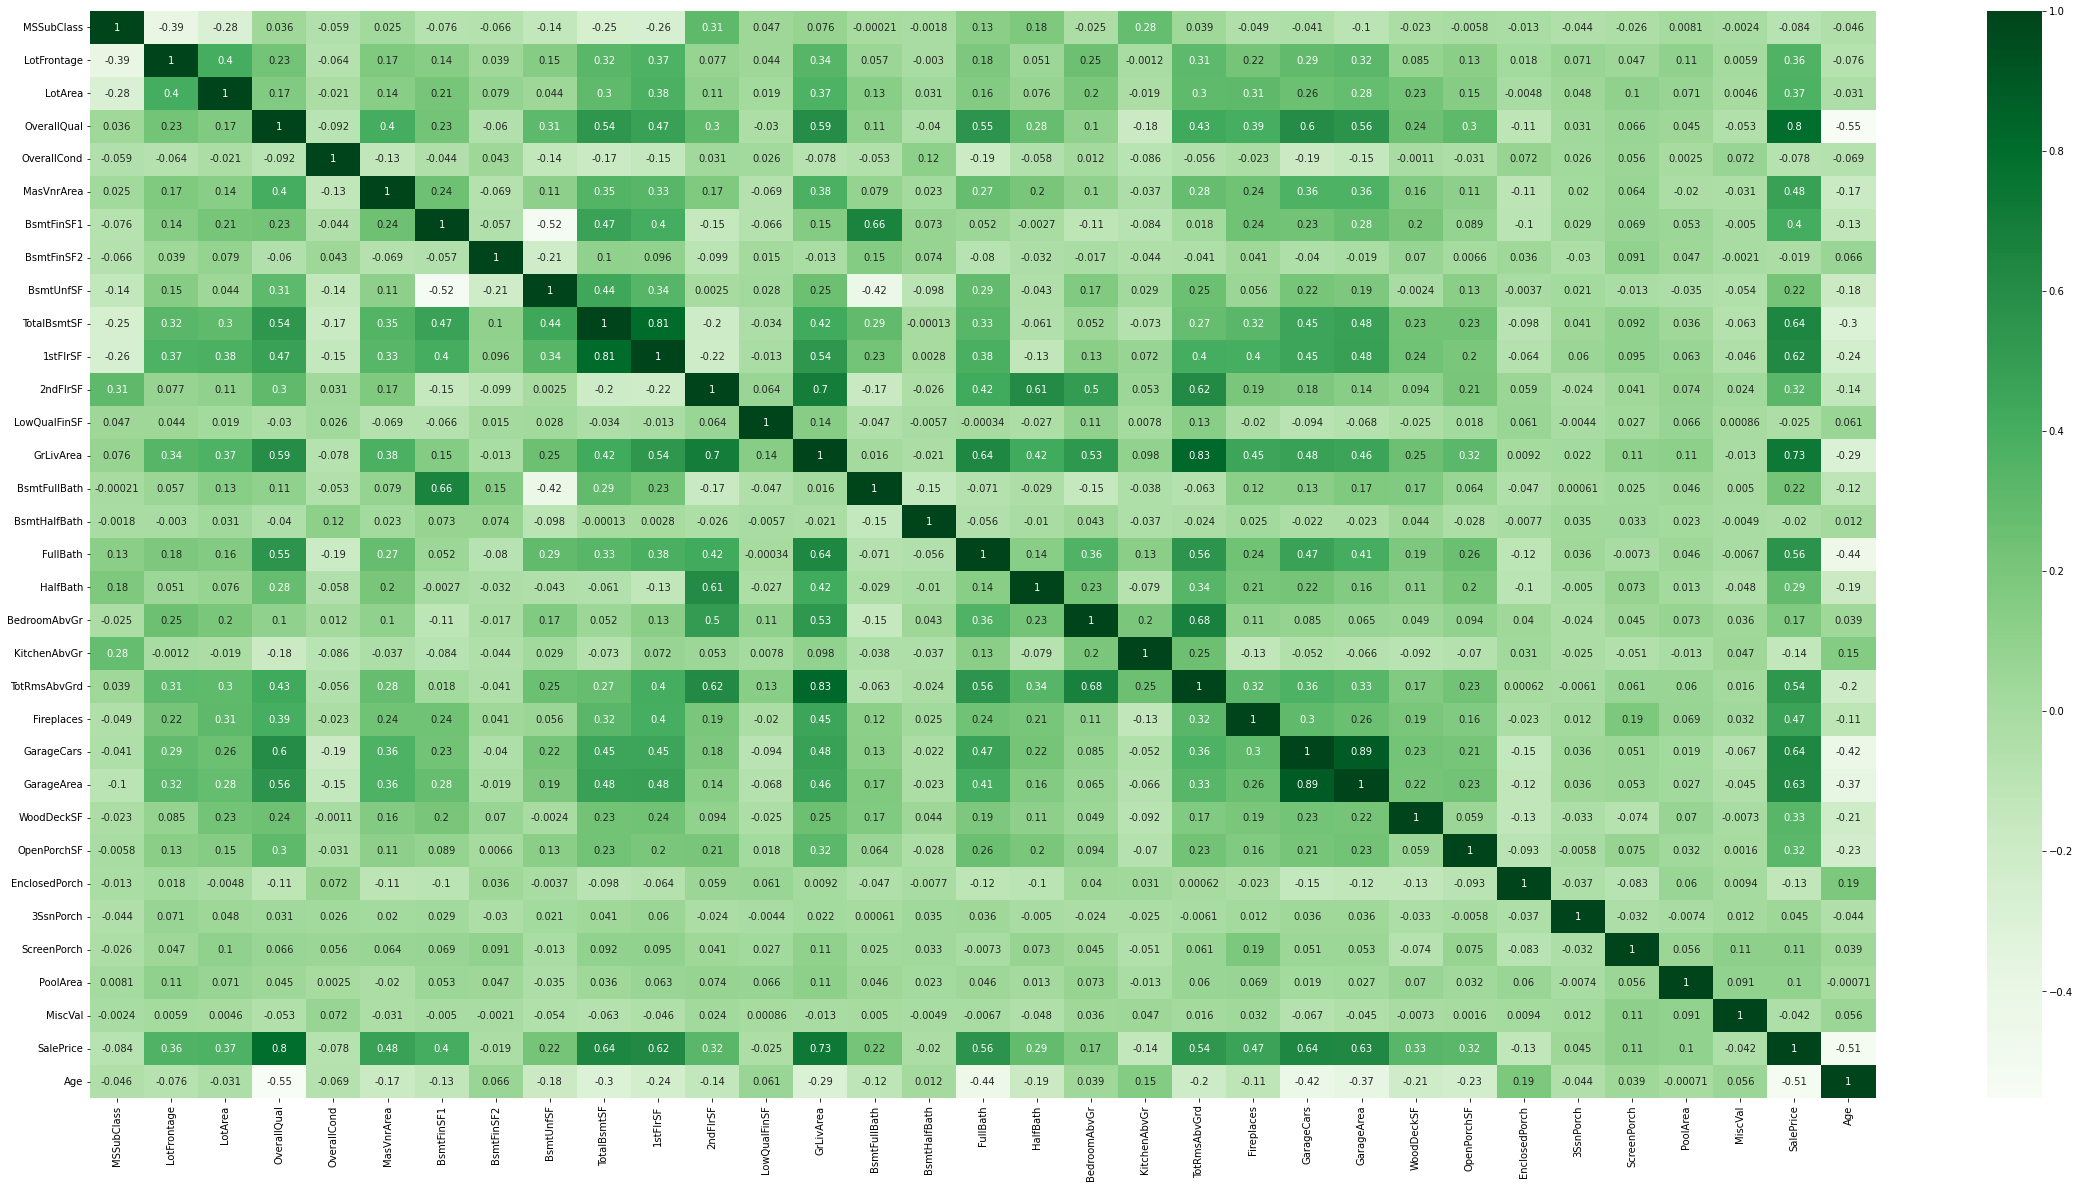

In [108]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()
#Observation
#OverallQual is highly correlated with the target Variable.
#GrLivArea is also positively highly correlated with the target variable.

### Creating Dummy Variables

In [109]:
status = pd.get_dummies(data[categorical_variables],drop_first=True) #creating dummies for all variables.

In [110]:
status.head()

,MSSubClass,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown Category,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown Category,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown Category,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown Category,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown Category,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown Category,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown Category,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unknown Category,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown Category,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown Category,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown Category,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown Category,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_Group_10-20,Age_Group_20-30,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60-70,Age_Group_70-80,Age_Group_80-90,Age_Group_90-100,Age_Group_100-110,Age_Group_110-120,Age_Group_120-130,Age_Group_130-140,Age_Group_140-150,Age_Group_150-160,Age_Group_160-170
0,60,7,5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,

In [111]:
status = status.drop(['MSSubClass','OverallQual','OverallCond'],axis=1)#dropping columns which were not getting dummies created.

In [112]:
status.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown Category,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown Category,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown Category,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown Category,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown Category,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown Category,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown Category,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unknown Category,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown Category,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown Category,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown Category,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown Category,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age_Group_10-20,Age_Group_20-30,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60-70,Age_Group_70-80,Age_Group_80-90,Age_Group_90-100,Age_Group_100-110,Age_Group_110-120,Age_Group_120-130,Age_Group_130-140,Age_Group_140-150,Age_Group_150-160,Age_Group_160-170
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [113]:
data1 = data[continuous_variables] #creating dataset of all categorical variables.
data1.head()

,Age,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,5,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500
1,31,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500
2,6,68.0,11250,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500
3,36,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000
4,8,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000


In [114]:
#Creating dummies for the left out three variables.
data5 = pd.DataFrame() 
l = ['OverallCond','MSSubClass','OverallQual']
for i in l:
  x=pd.get_dummies(data[i],prefix=i,drop_first=True)
  data5 = pd.concat([data5,x],axis=1)
data5.head()

,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
final_data = pd.concat([data1,data5,status],axis=1) #creating the final dataset for model training.
final_data.head()

,Age,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown Category,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown Category,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown Category,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown Category,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown Category,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown Category,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown Category,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unknown Category,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown Category,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown Category,Gara

In [116]:
final_data.shape

(1452, 287)

## Splitting the data and Scaling the numerical data


In [117]:
#Splitting the data into 70% training data ad 30% testing data.
data_train,data_test = train_test_split(final_data,train_size=0.7,random_state=100) 

In [118]:
#scaling the numerical values.
scaler=MinMaxScaler()

data_train[continuous_variables]=scaler.fit_transform(data_train[continuous_variables])

In [119]:
data_train.head()

,Age,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown Category,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown Category,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown Category,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown Category,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown Category,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown Category,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown Category,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unknown Category,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown Category,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown Category,Gara

In [120]:
data_train.shape

(1016, 287)

In [121]:
#Splitting the target variable from the training data.
y_train = data_train.pop('SalePrice')
X_train = data_train

In [122]:
#Training the first model.
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [123]:
print(lm.intercept_)
print(lm.coef_)

5328819565.850636
[-3.28042210e-02  2.80353592e-02  7.17998133e-02  1.92309811e-02
  4.32841805e+10  2.14505673e+10  4.47397547e+10 -6.00998931e+10
  1.36733696e+10  1.04575956e+10  2.60300443e+09 -2.14621260e+10
  1.06801380e-02  7.81132216e-03  2.25283702e-02  9.21791717e-03
 -2.79769956e-02 -4.59177578e-02 -4.77135459e-03  2.24586009e-02
  2.42599366e-02  1.60109508e-02  7.56165011e-03  1.69688027e-03
 -2.84402976e-03  3.29193058e-02  1.09643291e-02  4.68357609e-02
  7.55831684e-03 -6.34347970e+09 -6.34347970e+09 -6.34347970e+09
 -6.34347970e+09 -6.34347970e+09 -6.34347970e+09 -6.34347970e+09
 -6.34347970e+09 -1.00819170e-02  1.67292953e-02  1.25898123e-02
 -3.16619873e-04  2.11162567e-02  8.28766823e-03 -4.26213443e-02
 -8.70895386e-03 -7.49254227e-03 -9.32264774e+09 -1.27296448e-02
  6.33734465e-03 -1.25615597e-02 -2.59401798e-02 -5.56404528e+09
 -5.56404528e+09 -5.56404528e+09 -5.56404528e+09 -5.56404528e+09
 -5.56404528e+09 -5.56404528e+09 -5.56404528e+09 -5.56404528e+09
  6.418

In [124]:
#preparing the test dataset.
data_test[continuous_variables] = scaler.transform(data_test[continuous_variables])
data_test.head()

,Age,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_Unknown Category,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_Unknown Category,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown Category,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Unknown Category,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_Unknown Category,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_Unknown Category,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_Unknown Category,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_Unknown Category,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown Category,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown Category,Gara

In [125]:
#Extracting the target variable.
y_test = data_test.pop('SalePrice')
X_test = data_test

In [126]:
y_pred_train_lr = lm.predict(X_train)
y_pred_test_lr =  lm.predict(X_test)

In [127]:
r2_score(y_true = y_train,y_pred=y_pred_train_lr)

0.9511529268150749

In [128]:
#Evaluating the model.
r2_score(y_true = y_test,y_pred=y_pred_test_lr)

-3.338411582890507e+19

In [129]:
#Evaluating the model.
y_train_pred = y_pred_train_lr
y_test_pred = y_pred_test_lr

metric = []

r2_train_lr = r2_score(y_train,y_train_pred) #calculating R2 score for train set.
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_test_pred) #calculating R2 score for test set.
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_train_pred)) #calculating RSS for train set.
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test-y_test_pred)) #calculating RSS for test set.
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_train_pred) #calculating MSE for train set.
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_test_pred) #calculating MSE for test set.
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9511529268150749
-3.338411582890507e+19
0.5897706123154344
1.8470833701292904e+20
0.0005804828861372386
4.2364297480029594e+17


Here the model is not performing well on the testing dataset even though it is performing well on the training dataset.

This requires to perform regularisation and then create a model for prediction.

## Ridge Regression Model

In [130]:
ridge_m = Ridge() #initializing ridge object.

In [131]:
param= {'alpha':[x for x in [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10,20,100]]} #setting the value of lambda parameters to check for the best parameters.

folds=5 #setting fold value for cross validation.

ridge_m_grd = GridSearchCV(estimator = ridge_m,  #compiling the model for finding best value of lambda.
                           param_grid=param,
                           scoring='neg_mean_absolute_error',
                           cv = folds,
                           return_train_score = True,
                           verbose=1)
ridge_m_grd.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10,
                                   20, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
print(ridge_m_grd.best_params_)

{'alpha': 5}


In [133]:
#compiling model with best value of lambda.
alpha=5
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-1.40029141e-02  2.18816420e-02  2.64555827e-02  2.12458145e-02
  4.74995381e-02  8.88960018e-03  2.03722872e-02  5.25477920e-02
  6.12041086e-02  5.77682625e-02 -9.68294274e-03  6.59663810e-02
  1.55220184e-02  3.85150039e-03  3.41879269e-02  1.51464511e-02
 -4.23576253e-03 -1.87966771e-02  2.84278110e-02  2.96265818e-02
  2.78834844e-02  2.03922832e-02  1.66813568e-02 -3.65474344e-03
  2.71799662e-04  1.35521284e-02  1.15330727e-02  3.20085612e-02
  4.71549623e-04  9.49563440e-04 -1.90638625e-02 -1.53453928e-02
 -4.25134647e-03  5.27749841e-03  9.53204488e-03  9.35578107e-03
  2.02300295e-02 -1.33653246e-02  7.37787128e-03  3.02998750e-03
  2.10396911e-04  1.10717029e-02  5.91688582e-03  4.48458884e-04
 -1.45843293e-03 -5.19156034e-03 -9.47736660e-03 -1.32769751e-02
 -4.46884391e-03 -3.58886473e-03 -7.70688529e-03 -6.71851565e-03
 -2.34016840e-02 -2.18062342e-02 -2.43249286e-02 -2.51767531e-02
 -1.57111173e-02  6.21956529e-03  3.97667368e-02  7.78372462e-02
  1.84788403e-02  4.04419

In [134]:
#Evaluating the model.
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train,y_train_pred) #calculating R2 score for train set.
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_test_pred) #calculating R2 score for test set.
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_train_pred)) #calculating RSS for train set.
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test-y_test_pred)) #calculating RSS for test set.
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_train_pred) #calculating MSE for train set.
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_test_pred) #calculating MSE for test set.
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.923866577443798
0.8945924482442215
0.9192209954658693
0.5832011155603718
0.0009047450742774304
0.0013376172375237885


## Applying Lasso Regularisation Technique

In [135]:
lasso_m = Lasso() #initializing lasso object.

In [136]:
folds=5 #setting cross validation folds.

lasso_m_grd = GridSearchCV(estimator = lasso_m,         #compiling the model for the bet value of Lambda.
                           param_grid=param,
                           scoring='neg_mean_absolute_error',
                           cv = folds,
                           return_train_score = True,
                           verbose=1)
lasso_m_grd.fit(X_train,y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10,
                                   20, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
print(lasso_m_grd.best_params_) #looking for the best value of lambda.

{'alpha': 0.0001}


In [138]:
#creating the model with parameter tuning.
alpha=0.0001 #setting the parameter.
lasso=Lasso(alpha=alpha) #creating the model with tuned parameter.
lasso.fit(X_train,y_train) #fitting the dataset.
print(lasso.coef_) 

[-2.11112659e-02  1.63623945e-02  4.30365727e-02  1.12101291e-02
  4.50465595e-02  0.00000000e+00  0.00000000e+00  1.08146902e-01
  9.47697125e-02  9.20734786e-02 -0.00000000e+00  1.19686548e-01
  5.70995503e-03  0.00000000e+00  1.57089931e-02  4.16209194e-03
 -1.14686700e-02 -4.63556344e-02  0.00000000e+00  1.65534579e-02
  2.89032008e-02  3.63750425e-03  6.99252946e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  6.16279363e-03  1.40631407e-02
  0.00000000e+00 -0.00000000e+00 -2.06164238e-02 -2.02075254e-02
 -9.75975404e-03  0.00000000e+00  5.45969780e-03  5.86472961e-03
  1.53651194e-02 -7.45442095e-03  0.00000000e+00  1.09398943e-03
 -0.00000000e+00  1.29715226e-02  0.00000000e+00 -6.12235594e-03
  1.73537709e-03 -0.00000000e+00 -4.35578516e-03 -9.50983339e-03
 -0.00000000e+00 -0.00000000e+00 -4.38190114e-03  0.00000000e+00
 -3.45389091e-03 -0.00000000e+00 -6.29989081e-04 -1.86897112e-03
  8.81424212e-03  3.33672331e-02  7.92257636e-02  1.56631136e-01
  1.11955995e-02  0.00000

In [139]:
#Evaluating the model.
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train,y_train_pred) #calculating R2 score for Train set.
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_test_pred) #calculating R2 score for test set.
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_train_pred)) #calculating RSS for train set.
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test-y_test_pred)) #calculating RSS for test set.
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_train_pred) #calculating MSE for train set.
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_test_pred) #calculating MSE for test set.
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9395434615424841
0.864821770826054
0.7299411690353753
0.7479169446642517
0.0007184460325151331
0.0017154058363858984


In [140]:
lr_table = {'Metric':['R2 score(Train)','R2 score(Test)','RSS(Train)','RSS(Test)','MSE(Train)','MSE(Test)'],
            'Linear Regression':metric}     #creating a dataset with metrics values.
lr_metric = pd.DataFrame(lr_table,columns = ['Metric','Linear Regression']) #adding Linear regression metrics.
rg_metric = pd.Series(metric2,name='Ridge Regression') #adding ridge regression metrics.
ls_metric = pd.Series(metric3,name='Lasso Regression') #adding lasso regression metrics.


final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis=1) #adding all three metrics into a single frame.

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 score(Train),9.511529e-01,0.923867,0.939543
1,R2 score(Test),-3.338412e+19,0.894592,0.864822
2,RSS(Train),5.897706e-01,0.919221,0.729941
3,RSS(Test),1.847083e+20,0.583201,0.747917
4,MSE(Train),2.409321e-02,0.030079,0.026804
5,MSE(Test),6.508786e+08,0.036573,0.041417


### Observation

Ridge Regression is the most optimal in this case.

## Comparing Coeffs

In [141]:
betas = pd.DataFrame(data_train.columns)
betas.rows=data_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(20)

,0,Linear,Ridge,Lasso
0,Age,-3.280422e-02,-0.014003,-0.021111
1,LotFrontage,2.803536e-02,0.021882,0.016362
2,LotArea,7.179981e-02,0.026456,0.043037
3,MasVnrArea,1.923098e-02,0.021246,0.011210
4,BsmtFinSF1,4.328418e+10,0.047500,0.045047
5,BsmtFinSF2,2.145057e+10,0.008890,0.000000
6,BsmtUnfSF,4.473975e+10,0.020372,0.000000
7,TotalBsmtSF,-6.009989e+10,0.052548,0.108147
8,1stFlrSF,1.367337e+10,0.061204,0.094770
9,2ndFlrSF,1.045760e+10,0.057768,0.092073


### Subjective Questions codes.

In [142]:
#creating the model with parameter tuning.
alpha=0.0001*2 #setting the parameter.
lasso=Lasso(alpha=alpha) #creating the model with tuned parameter.
lasso.fit(X_train,y_train) #fitting the dataset.
print(lasso.coef_) 

[-2.38616838e-02  9.20475157e-03  3.32762198e-02  5.25551093e-03
  4.73443589e-02  0.00000000e+00  0.00000000e+00  1.10814721e-01
  5.32035625e-03  1.80748039e-02 -0.00000000e+00  2.43483491e-01
  4.53376448e-05  0.00000000e+00  8.00387991e-03  2.70509037e-03
 -0.00000000e+00 -1.22456754e-02  0.00000000e+00  2.05860481e-02
  3.22014663e-02  4.36796765e-03  6.78123486e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.25346081e-03  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.55380431e-02 -1.89950712e-02
 -8.44370288e-03  0.00000000e+00  4.16032531e-03  1.44783781e-03
  5.75759929e-03 -4.30303081e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.05319547e-02  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -7.58038300e-03 -4.03336778e-03
 -0.00000000e+00 -0.00000000e+00 -1.81685118e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.96504021e-04 -1.04478550e-03
  8.45713220e-03  3.52144310e-02  8.26163956e-02  1.54441474e-01
  7.99966843e-03  0.00000

In [143]:
#Evaluating the model.
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric3 = []

r2_train_lr = r2_score(y_train,y_train_pred) #calculating R2 score for Train set.
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_test_pred) #calculating R2 score for test set.
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_train_pred)) #calculating RSS for train set.
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test-y_test_pred)) #calculating RSS for test set.
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_train_pred) #calculating MSE for train set.
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_test_pred) #calculating MSE for test set.
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9279367917530817
0.8744904926727557
0.870077973603463
0.6944216374200041
0.0008563759582711249
0.0015927101775688166


In [145]:
#compiling model with best value of lambda.
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-1.37394266e-02  2.05212538e-02  2.29622948e-02  2.15334233e-02
  4.20317823e-02  6.74932092e-03  1.85730369e-02  4.65065907e-02
  5.27830645e-02  4.52715675e-02 -7.02186718e-03  5.48350216e-02
  1.40597965e-02  2.67976106e-03  3.28097753e-02  1.59514234e-02
  1.27390270e-03 -1.17594789e-02  2.99983238e-02  2.53391096e-02
  2.70341201e-02  2.24231262e-02  1.69113243e-02 -7.81126601e-04
  7.28739195e-04  7.99513103e-03  9.73464968e-03  2.28893187e-02
  8.62370343e-05 -9.17787867e-04 -1.53478454e-02 -1.35137960e-02
 -3.24641586e-03  5.23498533e-03  9.00113909e-03  7.21141269e-03
  1.61148730e-02 -1.31356702e-02  4.10214989e-03  2.84351918e-03
  1.23608795e-03  8.79859267e-03  5.61783570e-03  2.60277955e-03
 -2.08945424e-03 -4.55683573e-03 -8.09281122e-03 -1.17556856e-02
 -5.32493202e-03 -2.93770787e-03 -6.46612597e-03 -4.86728299e-03
 -1.93035308e-02 -1.88719608e-02 -2.20834911e-02 -2.34594680e-02
 -1.41556249e-02  8.37924490e-03  3.53361950e-02  6.35624837e-02
  1.32220187e-02  2.06686

In [146]:
#Evaluating the model.
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train,y_train_pred) #calculating R2 score for train set.
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test,y_test_pred) #calculating R2 score for test set.
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_train_pred)) #calculating RSS for train set.
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test-y_test_pred)) #calculating RSS for test set.
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_train_pred) #calculating MSE for train set.
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test,y_test_pred) #calculating MSE for test set.
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9125190305205095
0.8909864142866936
1.056229198022646
0.6031526559552333
0.001039595667345124
0.0013833776512734708


In [149]:
betas = pd.DataFrame(data_train.columns)
betas.rows=data_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values('Lasso',ascending=False)

,0,Linear,Ridge,Lasso
11,GrLivArea,-2.146213e+10,0.054835,0.243483
59,OverallQual_10,-5.564045e+09,0.063562,0.154441
7,TotalBsmtSF,-6.009989e+10,0.046507,0.110815
58,OverallQual_9,-5.564045e+09,0.035336,0.082616
4,BsmtFinSF1,4.328418e+10,0.042032,0.047344
92,Neighborhood_NoRidge,2.930951e-02,0.046738,0.044338
57,OverallQual_8,-5.564045e+09,0.008379,0.035214
2,LotArea,7.179981e-02,0.022962,0.033276
20,GarageCars,2.425994e-02,0.027034,0.032201
83,Neighborhood_Crawfor,2.481318e-02,0.026653,0.031611


In [150]:
X_train = X_train.drop(['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','BsmtFinSF1'],axis=1)
X_test = X_test.drop(['GrLivArea','OverallQual_10','TotalBsmtSF','OverallQual_9','BsmtFinSF1'],axis=1)

In [151]:
#creating the model with parameter tuning.
alpha=0.0001 #setting the parameter.
lasso=Lasso(alpha=alpha) #creating the model with tuned parameter.
lasso.fit(X_train,y_train) #fitting the dataset.
print(lasso.coef_) 

[-1.63763911e-02  1.98864039e-02  3.84776997e-02  2.63085125e-02
 -0.00000000e+00 -0.00000000e+00  2.61426516e-01  1.49552436e-01
 -0.00000000e+00  2.24575823e-02  3.15695497e-04  2.60485026e-02
  7.89447064e-03 -2.07212016e-02 -5.35429645e-02 -0.00000000e+00
  2.00205030e-02  2.93855947e-02  5.71941316e-03  1.04253923e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.09916704e-03
  6.36277543e-02  0.00000000e+00  0.00000000e+00 -2.44725946e-02
 -2.13325364e-02 -1.00798380e-02  0.00000000e+00  3.58066039e-03
  5.29015012e-03  1.25590501e-02 -1.32279542e-02  0.00000000e+00
  1.43203434e-03 -0.00000000e+00  9.97239210e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.16481303e-02
 -9.63510051e-03 -0.00000000e+00 -0.00000000e+00 -8.12614385e-03
 -3.71113866e-03 -5.26959673e-02 -4.79633661e-02 -5.04891337e-02
 -5.40412016e-02 -4.70452498e-02 -2.93030236e-02  1.25669973e-02
  0.00000000e+00  3.52108862e-03  0.00000000e+00  0.00000000e+00
  1.96637706e-03  0.00000

In [155]:
betas_lasso = pd.DataFrame(X_train.columns)
betas_lasso.rows=X_train.columns
betas_lasso['Lasso'] = lasso.coef_
betas_lasso.sort_values('Lasso',ascending=False)

,0,Lasso
6,1stFlrSF,0.261427
7,2ndFlrSF,0.149552
132,RoofMatl_WdShngl,0.070842
24,PoolArea,0.063628
87,Neighborhood_NoRidge,0.056899
94,Neighborhood_StoneBr,0.042731
2,LotArea,0.038478
78,Neighborhood_Crawfor,0.032027
186,BsmtExposure_Gd,0.029774
17,GarageCars,0.029386
